---
### 교통사고 예측하기 (회귀식과 RandomForest 예측 비교)

In [1]:
seoul <- read.csv("../Data/newSeoul2019.csv")
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [2]:
summary(seoul)

      년도            월           자치구명       발생건수        사망자수     
 Min.   :2011   Min.   : 1.00   강남구 : 108   Min.   : 45.0   Min.   : 0.000  
 1st Qu.:2013   1st Qu.: 3.75   강동구 : 108   1st Qu.:100.0   1st Qu.: 0.000  
 Median :2015   Median : 6.50   강북구 : 108   Median :122.0   Median : 1.000  
 Mean   :2015   Mean   : 6.50   강서구 : 108   Mean   :133.3   Mean   : 1.207  
 3rd Qu.:2017   3rd Qu.: 9.25   관악구 : 108   3rd Qu.:149.0   3rd Qu.: 2.000  
 Max.   :2019   Max.   :12.00   광진구 : 108   Max.   :383.0   Max.   :10.000  
                                (Other):2052                                   
    부상자수    
 Min.   : 55.0  
 1st Qu.:138.0  
 Median :168.0  
 Mean   :187.4  
 3rd Qu.:208.0  
 Max.   :552.0  
                

In [3]:
str(seoul)

'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [4]:
# 서울의 발생건수와 부상자수 상관계수

cor(seoul$발생건수, seoul$부상자수)

[1] 0.9808932

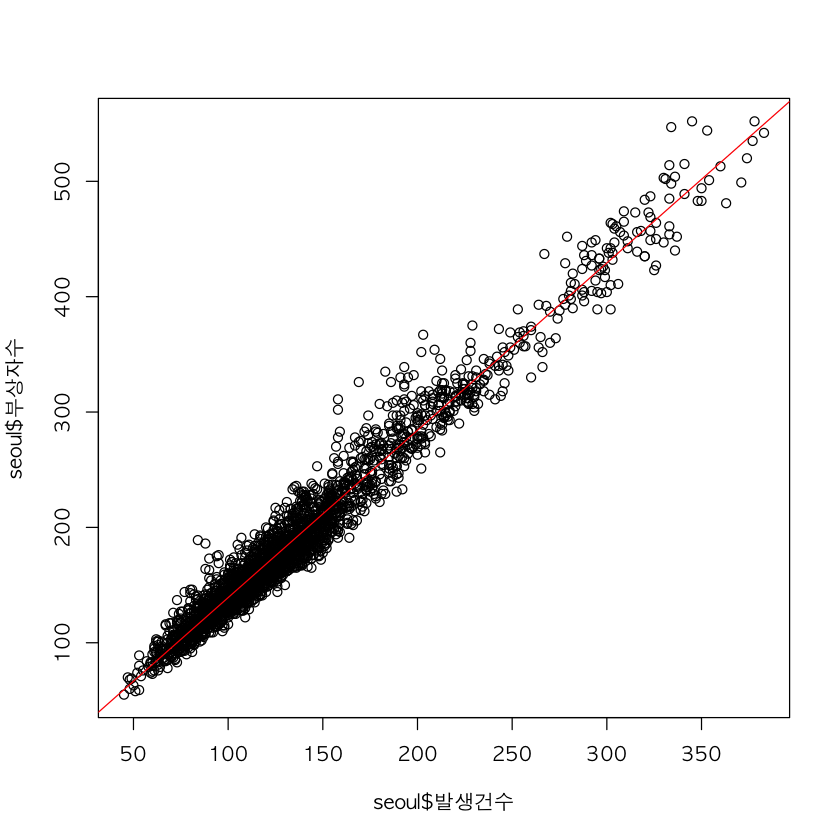

In [5]:
# 서울의 발생건수와 부상자수의 산포도와 회귀선 그리기

options(warn = -1)

par(family = "AppleGothic")
plot(seoul$부상자수 ~ seoul$발생건수)

r <- lm(seoul$부상자수 ~ seoul$발생건수)
abline(r, col = 'red')

In [6]:

# 예측력

options(scipen = 100)
summary(r)
r


Call:
lm(formula = seoul$부상자수 ~ seoul$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.154  -9.797  -1.421   7.611  87.718 

Coefficients:
                Estimate Std. Error t value             Pr(>|t|)    
(Intercept)    -5.895918   0.794301  -7.423    0.000000000000153 ***
seoul$발생건수  1.450495   0.005539 261.890 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.23 on 2698 degrees of freedom
Multiple R-squared:  0.9622,	Adjusted R-squared:  0.9621 
F-statistic: 6.859e+04 on 1 and 2698 DF,  p-value: < 0.00000000000000022



Call:
lm(formula = seoul$부상자수 ~ seoul$발생건수)

Coefficients:
   (Intercept)  seoul$발생건수  
        -5.896           1.450  


In [7]:
# 회귀식



# - 발생건수가 100건일 경우의 부상자수 예측
y = 1.450495*200
y
cat(y-15.23, "~", y+15.23)

[1] 290.099

274.869 ~ 305.329

In [8]:
step(r, direction = "backward")

Start:  AIC=14707.13
seoul$부상자수 ~ seoul$발생건수

                 Df Sum of Sq      RSS   AIC
<none>                          625690 14707
- seoul$발생건수  1  15905779 16531469 23545



Call:
lm(formula = seoul$부상자수 ~ seoul$발생건수)

Coefficients:
   (Intercept)  seoul$발생건수  
        -5.896           1.450  


In [16]:
# 랜덤 포레스트로 예측
# - 발생건수가 100건일 경우의 부상자수 예측
set.seed(1234)
library(randomForest)
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



In [21]:
samp <- createDataPartition(seoul$부상자수, p=0.7, list=F)

data.tr <- seoul[samp, ]
data.test <- seoul[-samp,]

x <- subset(data.test, select = -부상자수)

y <- data.test$부상자수

In [24]:

model.rf <- randomForest(부상자수 ~ 발생건수, data = seoul, ntree = 100)

발생건수 = 200

pred2 <- predict(model.rf, x)
result <- 1 - (sum((y - pred2)^2) / sum((y - mean(y))^2))
result

[1] 0.9638235

> 다중회귀분석과 RandomForest의 예측력을 비교한 결과 <br>
다중회귀분석이 0.9621, RandomForest가 0.963823538174455 의 예측력으로<br>
두 모델이 비슷한 예측력을 보인다.